![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
print(bikes.groupby('season').total.mean())
print(bikes['season'].describe())
### esta es una prueba
## season : season (1:winter, 2:spring, 3:summer, 4:fall)
## estación : estación (1:invierno, 2:primavera, 3:verano, 4:otoño)

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64


Se observa que para la variable season hay 10.886 observaciones, esta corresponde a una variable categórica en donde la media se encuentra distribuida entre primavera y verano  y la mediana se encuentra en verano, adicionalmente el percentil 75 se encuentra en Otoño.

In [5]:
# Celda 1.2
print(bikes.groupby('hour').total.mean())
print(bikes['hour'].describe())

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


Se evidencia que para la variable "hour" en donde se definen las horas de alquiler de bicicletas se tiene que la hora promedio en donde más alquileres se dan es a las 11 am y la mediana se encuentra a las 12 horas, adicionalmente el percentil 75 se encuentra a las 18 horas.

<AxesSubplot:xlabel='season', ylabel='hour'>

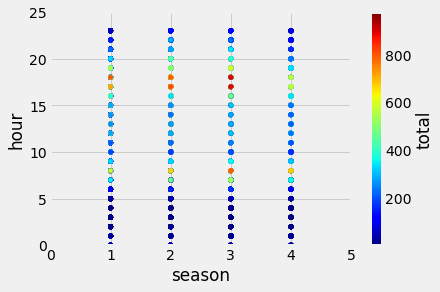

In [6]:
# Gráfica del salario, años y hits
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
bikes.plot(kind='scatter', x='season', y='hour', c='total', colormap='jet', xlim=(0, 5), ylim=(0, 25))

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

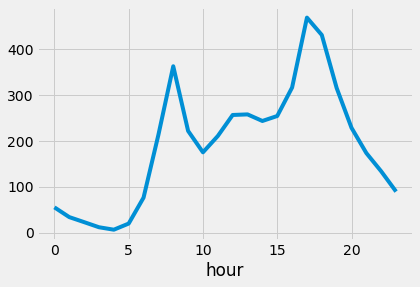

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

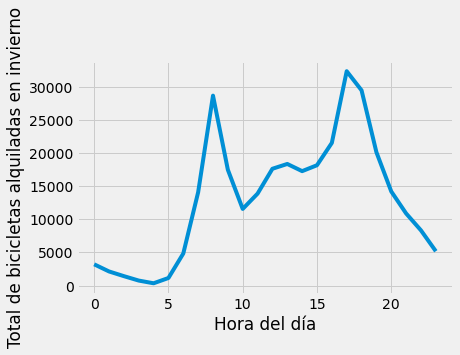

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes1 = bikes[bikes['season'] == 1]
h_total = bikes1.groupby('hour').total.sum()
plt.plot(h_total.index, h_total.values)
plt.xlabel('Hora del día')
plt.ylabel('Total de bicicletas alquiladas en invierno')
plt.show()

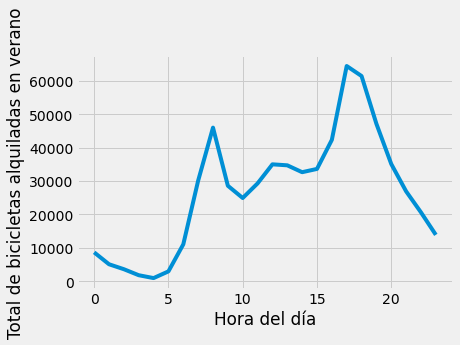

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes1 = bikes[bikes['season'] == 3]
h_total = bikes1.groupby('hour').total.sum()
plt.plot(h_total.index, h_total.values)
plt.xlabel('Hora del día')
plt.ylabel('Total de bicicletas alquiladas en verano')
plt.show()

Las horas en donde se realiza el mayor prestamos de bicicletas se encuentra entre las 7 y las 17 horas. Sin embargo la cantidad de bicicletas prestadas en la estacion de invierno se reduce en un 50% aproximadamente frente a las que se prestna en verano. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3

#Se procede a dummificar la variable season ya que corresponde a una variable categórica
bikes_dumm = pd.get_dummies(bikes['season'], prefix='season')
bikes2 = bikes.drop('season', axis=1)
bikes_dummies = pd.concat([bikes2, bikes_dumm], axis=1)
#print(bikes_dummies.head())

#definición test y train

XTotal=bikes_dummies[['season_1','season_2','season_3','season_4','hour']]
yTotal=bikes_dummies['total']
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

def linear_regression(XTrain, XTest, yTrain, yTest):
    model = LinearRegression()
    model.fit(XTrain, yTrain)
    yPred = model.predict(XTest)
    mse = mean_squared_error(yTest, yPred)
    r2 = r2_score(yTest, yPred)
    adj_r2 = 1 - (1-r2)*(len(yTest)-1)/(len(yTest)-XTest.shape[1]-1)
    coeficientes=model.coef_
    return [mse, adj_r2,coeficientes]

linear_regression(XTrain, XTest, yTrain, yTest)
## estación : estación (1:invierno, 2:primavera, 3:verano, 4:otoño)

[25644.421108938277,
 0.21408313805648105,
 array([-76.79345561,  24.11431232,  42.2252086 ,  10.45393469,
         10.62873885])]

Con un modelo de regresión lineal se obtiene un MSE de 25644 y un R2 de tan sólo 0.21. Se considera que con este modelo las variables predictoras no logran una confiable predicción del número de bicicletas a prestar.

por cada unidad que 
que esa var aumenta va a aumentar en x la cantidad de bici alquiladas 
Con respecto a los coeficientes podemos observar que por cada bicicleta que se alquila en invierno se reduce la cantidad total de bicicletas alquiladas en -76 unidades, por cada bicicleta que se alquila en primavera se aumenta la cantidad total de bicicletas alquiladas en 24 unidades, por cada bicicleta que se alquila en verano se aumenta la cantidad total de bicicletas alquiladas en 42 unidades y por cada bicicleta que se alquila en otoño se aumenta la cantidad total de bicicletas alquiladas en 10 unidades.  

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
#Descripción de variable a predecir
print(bikes['total'].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64


In [12]:
# se convierte la variable a predecir en binaria, dejando 0 como baja y 1 alta cantidad de bicicletas a prestar
# Alto cuando sea superior a la mediana

X =bikes[['season','hour']]
y= bikes['total'].where(bikes['total'] > 145, 1).where(bikes['total'] <= 145, 0)

In [13]:
# Definición de parámetros y criterios de parada
max_depth = None #Profundidad
num_pct = 10 #Punntos de corte
max_features = None
min_gain=0.001

# Impresión variable a usar (hour)
j = 1
#print(X.columns[j])
# División de la variable season_2 en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
#splits
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
# se selecciona un número de corte 6
k=6
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
print("gini_l: "+str(gini_l))
gini_r = gini(y_r)
print("gini_r: "+str(gini_r))

gini_l: 0.45996704105894015
gini_r: 0.4244963835026162


In [14]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
# Ganancia de hacer determinada partición
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_
    
# Ganancia pnderada de la variable 'hour' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

0.05488977659287542

In [15]:
# calcular las diferentes ganacias para todas las variables y dentro de cada una de ellas correo las diferentes particiones 
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(1, 8.0, 0.16178755449047394)

Lo anterior nos indica que la mejor ganacia es a partir de la variable 1, el split 8 y con estos se obtiene un gini impurity de 16%

In [16]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]
y.shape[0], y_l.shape[0], y_r.shape[0]
y.mean(), y_l.mean(), y_r.mean()

(0.5008267499540694, 0.905954368391764, 0.3011519473395502)

Inicialmente teniamos que en promedio la varibale y nos indicaba que el 50% de las observaciones presentaban cantidades altas , sin embargo luego de la partición , el promedio es 90 y a la derecha el 30

In [17]:

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth ==6:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [18]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 1,
 'y_prob': 0.5008265980896399,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 1,
  'y_prob': 0.9057285873192435,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 1,
   'y_prob': 0.973893664438077,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700476,
   'sl': {'y_pred': 1,
    'y_prob': 0.9892032762472077,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 1,
    'y_prob': 0.8818380743982495,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 455,
    'gain': 0.009214309359181716,
    'sl': {'y_pred': 1,
     'y_prob': 0.9475982532751092,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 227,
     'gain': 0.004655188204359839,
     'sl': {'y_pred': 1,
      'y_prob': 0.991304347826087,
      'level': 5,
      'split': -1,
      'n_samples': 113,
    

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [19]:
X = bikes[['season', 'hour']]
y = bikes['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mejor_mse = float('inf')
for max_depth in range(1, 10):
    for min_samples_split in range(2, 10):
        modelo = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        # Actualizar el mejor modelo si se obtuvo un menor mse
        if mse < mejor_mse:
            mejor_mse = mse
            mejor_modelo = modelo
            mejor_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

print('Mejores parámetros:', mejor_params)
print('MSE en el conjunto de validación:', mejor_mse)

y_val_pred = mejor_modelo.predict(X_test)
r2 = r2_score(y_test, y_val_pred)
print('Coeficiente de determinación R² en el conjunto de validación:', r2)

Mejores parámetros: {'max_depth': 8, 'min_samples_split': 2}
MSE en el conjunto de validación: 13659.493203354376
Coeficiente de determinación R² en el conjunto de validación: 0.5780261588685437


Se observa que el modelo de arboles de decisión tiene un mayor acercamiento de predicción puesto que llega a un r2 de 0.57 y un MSE DE 13.659 mientras que el modelo de regresión lineal llega a 0.21 y MSE de 25.644. En este caso el modelo de arboles de decisión selecciona un máximo de 8 nodos. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [20]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [21]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [22]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [23]:
# Celda 7

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

# Entrenamos un modelo de regresión logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# Evaluamos el rendimiento del modelo utilizando Accuracy y F1-Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Regresión logística:\n Accuracy: {accuracy_lr:.2f}, F1 Score: {f1_lr:.2f}")

Regresión logística:
 Accuracy: 0.61, F1 Score: 0.61


In [24]:
# Crear un árbol de decisión y ajustar el modelo a los datos de entrenamiento
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# Realizar predicciones con el modelo y evaluar su desempeño
tree_preds = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_f1_score = f1_score(y_test, tree_preds, average='weighted')

# Imprimir los resultados
print('Árbol de decisión - Accuracy: {:.2f}, F1-Score: {:.2f}'.format(tree_accuracy, tree_f1_score))

Árbol de decisión - Accuracy: 0.65, F1-Score: 0.65


El modelo de arboles de decisión genera una mayor predicción d ela variable de respuesta ya qe presenta un f1 Score de 0.65 ligeramente superior a la que nos da una regresión logistica, adicionalmente el accuracy que corresponde al procentane de aciertos que ha tenido nuestro modelo, para el caso de arboles nos da 0.65 en cambio con regresión logística se llega a 0.61

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [25]:
# Celda 7

# Proporciones de las diferentes clases de variable de interés (y)
y.value_counts().to_frame('popular').assign(percentage = lambda x: x/x.sum())

,popular,percentage
0,3000,0.5
1,3000,0.5


In [26]:
# Entrenamos un modelo de árbol de decisión con profundidad máxima de 5

dt_model = DecisionTreeClassifier(max_depth=12, random_state=42)
dt_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluamos el rendimiento del modelo utilizando Accuracy y F1-Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Árbol de decisión:\n Accuracy: {accuracy_dt:.2f}, F1 Score: {f1_dt:.2f}")

Árbol de decisión:
 Accuracy: 0.56, F1 Score: 0.58


In [27]:
# Celda 8
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=300)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=12, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print('F1 Score: ' + str(metrics.f1_score(y_pred, y_test)))
# Desempeño al hacer votación mayoritaria
print('Accuracy: ' +str(metrics.accuracy_score(y_pred, y_test)))

F1 Score: 0.6684350132625994
Accuracy: 0.6666666666666666


In [28]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=300)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i],min_samples_leaf=3)
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print('F1 Score: ' + str(metrics.f1_score(y_pred, y_test)))
# Desempeño al hacer votación mayoritaria
print('Accuracy: ' +str(metrics.accuracy_score(y_pred, y_test)))

F1 Score: 0.661322645290581
Accuracy: 0.662


In [29]:
# Regresión Logistica

n_estimators = 100
n_bootstrap = 300

log_regs = {}
for i in range(n_estimators):
    bootstrap_indices = np.random.choice(X_train.index, size=n_bootstrap, replace=True)
    X_train_bootstrap = X_train.loc[bootstrap_indices]
    y_train_bootstrap = y_train.loc[bootstrap_indices]

    log_regs[i] = LogisticRegression(random_state=seeds[i])
    log_regs[i].fit(X_train_bootstrap, y_train_bootstrap)

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = log_regs[i].predict(X_test)

y_pred_ = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print('F1 Score: ' + str(metrics.f1_score(y_pred, y_test)))
# Desempeño al hacer votación mayoritaria
print('Accuracy: ' +str(metrics.accuracy_score(y_pred, y_test)))

F1 Score: 0.661322645290581
Accuracy: 0.662


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

(0.6635451505016723, 0.6646666666666666)

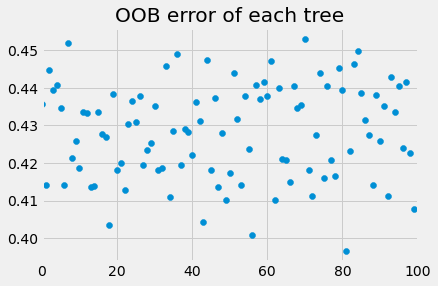

In [30]:
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 300 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=300)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=12, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6576637407157325, 0.662)

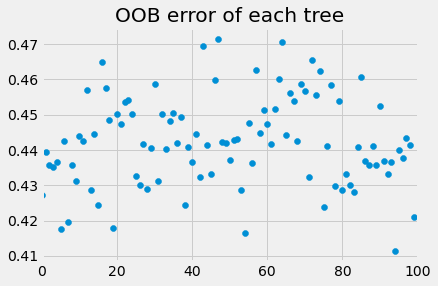

In [31]:
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=300)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i],min_samples_leaf=3)
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6065573770491803, 0.616)

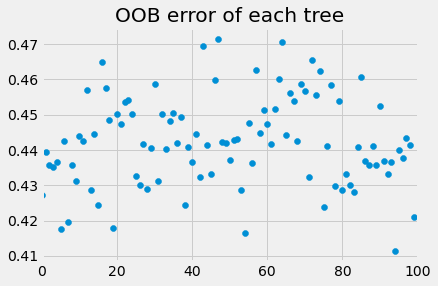

In [32]:
#regresion logistica

n_estimators = 100
n_bootstrap = 300

log_regs = {}
for i in range(n_estimators):
    bootstrap_indices = np.random.choice(X_train.index, size=n_bootstrap, replace=True)
    X_train_bootstrap = X_train.loc[bootstrap_indices]
    y_train_bootstrap = y_train.loc[bootstrap_indices]

    log_regs[i] = LogisticRegression(random_state=seeds[i])
    log_regs[i].fit(X_train_bootstrap, y_train_bootstrap)

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = log_regs[i].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
    errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    # Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
En el paso número 7 se aplicó la metodología de votación mayoritaria en donde cada árbol tiene el mismo peso en donde su predcción final se da por mayoría de votos, en este caso se aplicó un arbol de decisión en donde se dejó fijo una prfundidad de 12, para este se obtuvo un Accuracy de 0.56 y F1 Score de 0.58.

Posteriormente se creó una selección de 100 arboles y una profundida fija de 12 aplicando la metodología arrojó un Accuracy de 0.66 y F1 Score de 0.668 lo que evidencia una mejora considerable con respecto al modelo anterior el cuál contenía el mismo número de nodos.

Adicionalmente se creó un modelo con aplicación de votación mayoritaria sin un número limitado de profundidad pero si eligiendo el número minimo de features, en este caso se obtuvo un Accuracy y F1 Score de 0.66

Finalmente se aplicó este método a 100 regresiones logísticas que aunque no supera a los arboles de decisión si lo deja por encima del arbol de decisión sin aplicación de la metodología, accuracy de 0.66 pero con f1 Score de 0.66

En el paso número 8 se aplicó la metodología de votación ponderada en donde a diferencia del metodo anterior esta genera un peso a cada arbol de acuerdo a su rendimiento, en este caso se aplicó para 100 arboles y 300 muestras bagged la selección a traves de "out of bag" en donde para cada arbol se entrena con una muestra aleatoria dejando una parte de ellos sin utilizar  y así para cada arbol se utilizan estos datoa para calcular la puntuación de "out of bag" que posteriormente se utiliza para ajustar el peso de ese arbol en la votación ponderada.

Con lo anterior se obtuvo para un modelo con profundidad de 12 un f1 score de 0.663 y aun accuracy de 0.664, para el modelo sin especificar la profundidad y mínimo de features = 3 un accuracy 0.662 y un f1 score 0.65 algo más bajo que lo que nos dió con el méotodo de votación mayoritaria. Finalmente al aplicar esto a una regresión logística se obtuvo un f1 score de 0.606 y un accuracy de 0.616  

En general se puede concluir que ambas metodologías son fáciles de implementar, sin embargo la metodología de votación mayoritaria puede ser computacionalmente más eficiente ya que se debe ajustar los pesos de los árboles, aunque al no tener en cuenta el rendimiento  de cada arbol puede disminuir su poder predictivo. la metodología la votación ponderada al considerar el rendimiento de cada arbol puede llegar a predecir mejor dependiente de los datos  pero computacionalmente puede ser más costosa ya que debe asignar el peso a cada arbol según el out of bag. 